In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
age=[11,22,20,14,29,8,35,27,13,49,10,29,17]
ages=[18,34,76,29,15,41,46,26,54,38,20,32,43,22]
s1=pd.Series(age)
s2=pd.Series(ages)

In [17]:
s1.describe()

count    13.000000
mean     21.846154
std      11.746249
min       8.000000
25%      13.000000
50%      20.000000
75%      29.000000
max      49.000000
dtype: float64

<Axes: >

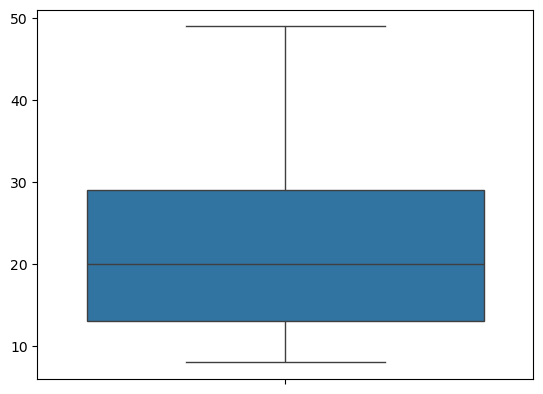

In [21]:
sns.boxplot(s1)

<Axes: ylabel='Count'>

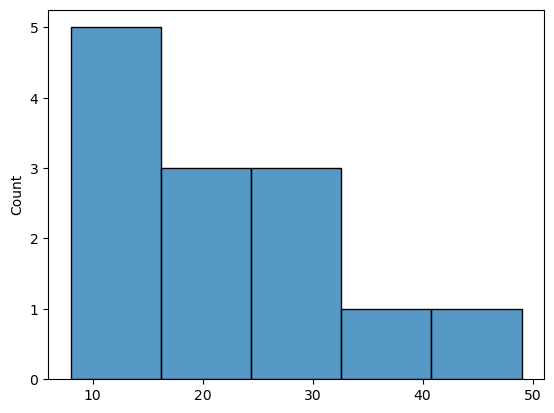

In [22]:
sns.histplot(s1)

In [18]:
s2.describe()

count    14.000000
mean     35.285714
std      16.363320
min      15.000000
25%      23.000000
50%      33.000000
75%      42.500000
max      76.000000
dtype: float64

<Axes: >

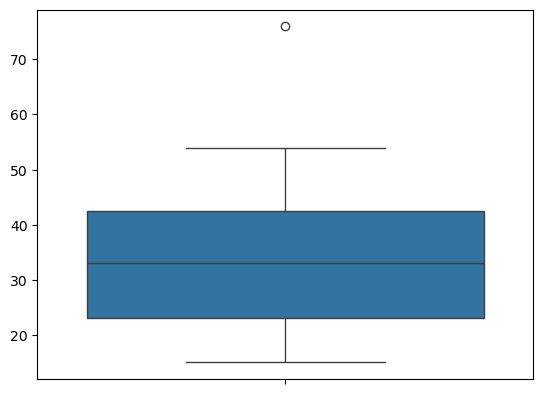

In [5]:
sns.boxplot(s2)

<Axes: ylabel='Count'>

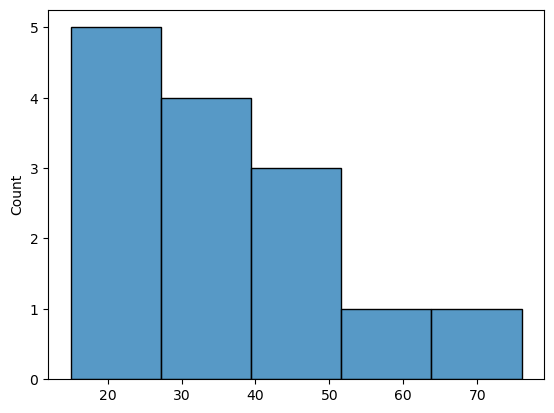

In [6]:
sns.histplot(s2)

In [11]:
height={'Mohan':5.9,'Maria':5.2,'Sakib':5.1,'Tao':5.5,'Virat':4.9,'Khusbu':5.4,'Dmitry':6.2,'Selena':6.5,'John':7.1,'Imran':14.5,'Jose':6.1,'Deepika':5.6,'Yoseph':1.2,'Binod':5.5}
s3=pd.Series(height)

In [10]:
s3.describe()

count    14.000000
mean      6.050000
std       2.779804
min       1.200000
25%       5.250000
50%       5.550000
75%       6.175000
max      14.500000
dtype: float64

In [12]:
height_data = {
    'Name': ['Mohan', 'Maria', 'Sakib', 'Tao', 'Virat', 'Khusbu', 'Dmitry', 'Selena', 'John', 'Imran', 'Jose', 'Deepika', 'Yoseph', 'Binod'],
    'Height': [5.9, 5.2, 5.1, 5.5, 4.9, 5.4, 6.2, 6.5, 7.1, 14.5, 6.1, 5.6, 1.2, 5.5]
}
df=pd.DataFrame(height_data)
df.head()

,Name,Height
0,Mohan,5.9
1,Maria,5.2
2,Sakib,5.1
3,Tao,5.5
4,Virat,4.9


In [32]:
df.shape

(14, 2)

In [13]:
df['Height']

0      5.9
1      5.2
2      5.1
3      5.5
4      4.9
5      5.4
6      6.2
7      6.5
8      7.1
9     14.5
10     6.1
11     5.6
12     1.2
13     5.5
Name: Height, dtype: float64

In [14]:
df['Height'].quantile(0.5)

5.55

In [15]:
df.describe()

,Height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [22]:
def detect_outliers(column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df['Height']<lower_bound)|(df['Height']>upper_bound)]
    return outliers

height_outliers=detect_outliers('Height')
print(height_outliers)



      Name  Height
9    Imran    14.5
12  Yoseph     1.2


In [21]:
def min_threshold(column):
    lower_bound=df[column].quantile(0.25)-1.5*(df[column].quantile(0.75)-df[column].quantile(0.25))
    return lower_bound
print(min_threshold('Height'))

3.8625000000000003


In [26]:
def max_threshold(column):
    upper_bound=df[column].quantile(0.75)+1.5*(df[column].quantile(0.75)-df[column].quantile(0.25))
    return upper_bound
print(max_threshold('Height'))

7.5625


In [29]:
df[df['Height']<df['Height'].quantile(0.25)-1.5*(df['Height'].quantile(0.75)-df['Height'].quantile(0.25))]

,Name,Height
12,Yoseph,1.2


In [28]:
df[df['Height']>df['Height'].quantile(0.75)+1.5*(df['Height'].quantile(0.75)-df['Height'].quantile(0.25))]

,Name,Height
9,Imran,14.5


In [35]:
upper_bound=df['Height'].quantile(0.75)+1.5*(df['Height'].quantile(0.75)-df['Height'].quantile(0.25))
lower_bound=df['Height'].quantile(0.25)-1.5*(df['Height'].quantile(0.75)-df['Height'].quantile(0.25))
df2=df[(df['Height']>lower_bound)&(df['Height']<upper_bound)]
df2.shape

(12, 2)

In [43]:
df.describe()

,Height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


<Axes: >

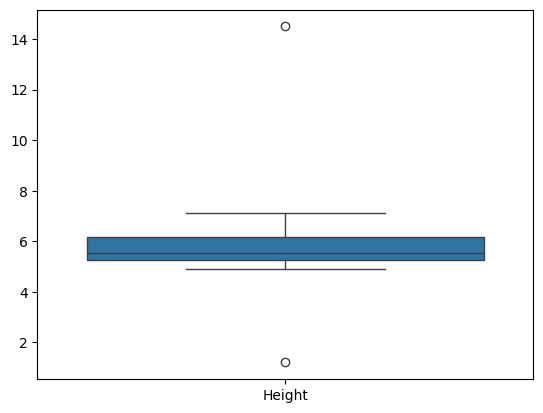

In [41]:
sns.boxplot(df)

In [44]:
df2.describe()

,Height
count,12.000000
mean,5.750000
std,0.636039
min,4.900000
25%,5.350000
50%,5.550000
75%,6.125000
max,7.100000


<Axes: >

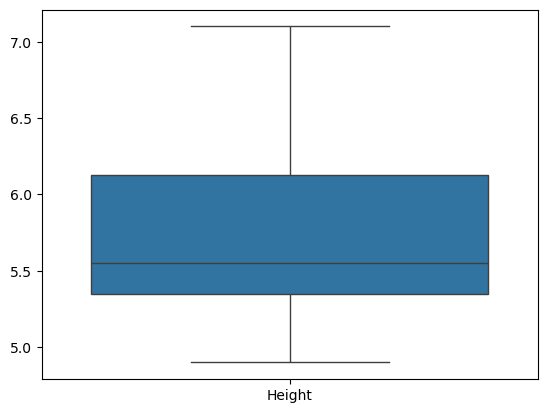

In [39]:
sns.boxplot(df2)